### Perimeter International Scholars, March 21 - April 8 2016
### Explorations in Condensed Matter Theory
# Many-body entanglement and tensor networks
 



Guifre Vidal, Perimeter Institute

# IJulia I: linear algebra and plotting

In [2]:
using Pkg
using JLD
using LinearMaps
using LinearAlgebra


In [3]:
# This is a comment
println("My name is Carlos Rodallega") # replace xxx with your name and press Shift+Enter

My name is Carlos Rodallega


You can use the menu arrows $\uparrow$ and $\downarrow$ to move from one cell to another. Try it!

### numbers

In [4]:
a = 1  # integer number

1

In [5]:
b = 2.3 # real number
c = a+b # sum

3.3

In [6]:
z = a + b*im  # complex numbers

1.0 + 2.3im

### vectors

In [7]:
v = [1.1 2.0 0 0.2]  # row vector Las separaciones se encuentran por espacios

1×4 Matrix{Float64}:
 1.1  2.0  0.0  0.2

In [8]:
w = [0.3 0 2 1.2]'  # column vector  

4×1 adjoint(::Matrix{Float64}) with eltype Float64:
 0.3
 0.0
 2.0
 1.2

In [9]:
w = rand(4,1) + im*rand(4,1) # random column vector -- try rand(1,4) to create a row vector

4×1 Matrix{ComplexF64}:
 0.39100610828572824 + 0.025660042783525405im
 0.39059290980568884 + 0.9296554095846457im
  0.6855614791964788 + 0.6439034212176554im
 0.08677163683614464 + 0.25838139885425915im

In [10]:
w[2] # access component 2 of the vector w, el conteo empieza en 1.

0.39059290980568884 + 0.9296554095846457im

In [11]:
v*w # scalar product as a 1x1 array

1×1 Matrix{ComplexF64}:
 1.2286468660929077 + 1.9392131460020212im

In [12]:
(v*w)[1] # scalar product as a single number

1.2286468660929077 + 1.9392131460020212im

In [13]:
sqrt((w'*w)[1]) # norm of w

1.45919931404858 + 0.0im

### matrices

In [14]:
M = w*w' #create the matrice

4×4 Matrix{ComplexF64}:
  0.153544+0.0im        0.176579-0.353478im   …  0.0405583-0.0988021im
  0.176579+0.353478im    1.01682+0.0im            0.274098-0.0202542im
  0.284581+0.234179im   0.866384-0.385832im        0.22586-0.121264im
 0.0405583+0.0988021im  0.274098+0.0202542im     0.0742903+0.0im

In [15]:
n=3
M = rand(n,n)  # nxn random matrix 

3×3 Matrix{Float64}:
 0.721063  0.550859   0.851691
 0.834151  0.0816136  0.121378
 0.332515  0.795296   0.759128

In [16]:
M' #Transpuesta de la matrix definida previamente.

3×3 adjoint(::Matrix{Float64}) with eltype Float64:
 0.721063  0.834151   0.332515
 0.550859  0.0816136  0.795296
 0.851691  0.121378   0.759128

In [17]:
M = (M+M')/2 # let us make M Hermitian!

3×3 Matrix{Float64}:
 0.721063  0.692505   0.592103
 0.692505  0.0816136  0.458337
 0.592103  0.458337   0.759128

### eigenvector decomposition

In [18]:
D,U = eigen(M) # eigenvalue decomposition

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
 -0.3672938542749735
  0.1939339315436106
  1.735164960607653
vectors:
3×3 Matrix{Float64}:
  0.500505   -0.562367  -0.658208
 -0.861313   -0.246727  -0.444146
  0.0873751   0.789221  -0.607862

In [19]:
D  # eigenvalues

3-element Vector{Float64}:
 -0.3672938542749735
  0.1939339315436106
  1.735164960607653

In [20]:
U # eigenvectors Cada columna tiene un vector propio de la matrix.

3×3 Matrix{Float64}:
  0.500505   -0.562367  -0.658208
 -0.861313   -0.246727  -0.444146
  0.0873751   0.789221  -0.607862

Is it true that $~~~~M = U \cdot D \cdot U^{\dagger}~~?$ 

In [21]:
N = U*diagm(D)*U' # let us build UDU' Diagonal matrix
display(M) # Are M and
display(N) # N the same?

3×3 Matrix{Float64}:
 0.721063  0.692505   0.592103
 0.692505  0.0816136  0.458337
 0.592103  0.458337   0.759128

3×3 Matrix{Float64}:
 0.721063  0.692505   0.592103
 0.692505  0.0816136  0.458337
 0.592103  0.458337   0.759128

In [22]:
display(M-N) # yes, up to numerical precision
println("The norm of M-N is ", norm(M-N))

3×3 Matrix{Float64}:
 -8.88178e-16  -5.55112e-16   1.22125e-15
 -5.55112e-16  -9.4369e-16    7.21645e-16
  1.11022e-15   7.21645e-16  -1.9984e-15

The norm of M-N is 3.1709454510692674e-15


In [23]:
evalue1 = D[1] # first eigenvalue of matrix M
evector1 = U[:,1] # first eigenvector of matrix M

3-element Vector{Float64}:
  0.5005053528536882
 -0.8613129446336134
  0.08737507179613165

Is it true that $~~~~M\cdot\vec{v}_1 = \lambda_1 \vec{v}_1 ~~~~?$ 

In [24]:
display(M*evector1) # 
display(evalue1*evector1) # 

3-element Vector{Float64}:
 -0.18383254013488698
  0.31635495117140716
 -0.03209232688755416

3-element Vector{Float64}:
 -0.18383254013488678
  0.3163549511714067
 -0.03209232688755372

### Kronecker product $~~~~A \otimes B = \left[ \begin{array}{cc} 
a_{11} B & a_{12}B &\cdots& a_{1n} B \\ 
a_{21} B & a_{22}B &\cdots& a_{2n} B \\
\vdots & \vdots & \cdots & \vdots \\
a_{n1} B & a_{n2}B &\cdots& a_{nn} B
\end{array} \right]$

In [25]:
I = [1 0; 0 1]

2×2 Matrix{Int64}:
 1  0
 0  1

In [26]:
X = [0 1; 1 0]

2×2 Matrix{Int64}:
 0  1
 1  0

In [27]:
A = [1 2; 3 4]

2×2 Matrix{Int64}:
 1  2
 3  4

Example: $$\left[ \begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array} \right] \otimes \left[ \begin{array}{cc} a & b \\ c & d \end{array} \right] = \left[ \begin{array}{cc} a & b & 0 & 0 \\ c & d & 0 & 0 \\ 0 & 0 & a & b \\ 0 & 0 & c & d \end{array} \right]$$

In [28]:
kron(I,A)

4×4 Matrix{Int64}:
 1  2  0  0
 3  4  0  0
 0  0  1  2
 0  0  3  4

In [29]:
kron(X,A)

4×4 Matrix{Int64}:
 0  0  1  2
 0  0  3  4
 1  2  0  0
 3  4  0  0

In [30]:
kron(A, I)

4×4 Matrix{Int64}:
 1  0  2  0
 0  1  0  2
 3  0  4  0
 0  3  0  4

In [31]:
kron(A,A)

4×4 Matrix{Int64}:
 1   2   2   4
 3   4   6   8
 3   6   4   8
 9  12  12  16

### quantum Ising model on N=3 spins
$$H = \sigma^x_1 \otimes \sigma^x_2 + \sigma^x_2 \otimes \sigma^x_3 +  \sigma^x_3 \otimes \sigma^x_1 
+ h\left( \sigma^z_1 + \sigma^z_2 + \sigma^z_3\right) $$

In [44]:
I = [1 0; 0 1]
#I = eye(2)

X = [0. 1; 1 0]
Z = [1. 0; 0 -1]

II = [1 0 0 0; 0 1 0 0; 0 0 1 0; 0 0 0 1]
#II = eye(4)


XX = kron(X,X)

kron(X,kron(I,X))

8×8 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0

In [45]:
HXX = kron(XX,I) + kron(I, XX) + kron(X,kron(I,X))

8×8 Matrix{Float64}:
 0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0
 0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0
 0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0
 0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0
 1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0
 1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0
 0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0

In [34]:
HZ = kron(Z,II) + kron(I,kron(Z,I)) + kron(II,Z)

8×8 Matrix{Float64}:
 3.0  0.0  0.0   0.0  0.0   0.0   0.0   0.0
 0.0  1.0  0.0   0.0  0.0   0.0   0.0   0.0
 0.0  0.0  1.0   0.0  0.0   0.0   0.0   0.0
 0.0  0.0  0.0  -1.0  0.0   0.0   0.0   0.0
 0.0  0.0  0.0   0.0  1.0   0.0   0.0   0.0
 0.0  0.0  0.0   0.0  0.0  -1.0   0.0   0.0
 0.0  0.0  0.0   0.0  0.0   0.0  -1.0   0.0
 0.0  0.0  0.0   0.0  0.0   0.0   0.0  -3.0

In [35]:
H = HXX + HZ
D,U = eigen(H)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
8-element Vector{Float64}:
 -3.2360679774997845
 -1.999999999999999
 -1.2360679774997845
  0.0
  1.1102230246251565e-15
  1.2360679774997896
  2.0
  3.23606797749979
vectors:
8×8 Matrix{Float64}:
  0.0        0.0        0.229753  0.0       …   0.0        0.0       0.973249
 -0.229753   0.0        0.0       0.0          -0.973249   0.0       0.0
  0.0        0.0        0.0       0.0           0.0       -0.707107  0.0
  0.0       -0.707107   0.0       0.707107      0.0        0.0       0.0
  0.0        0.0        0.0       0.0           0.0       -0.707107  0.0
  0.0        0.707107   0.0       0.707107  …   0.0        0.0       0.0
  0.0        0.0       -0.973249  0.0           0.0        0.0       0.229753
  0.973249   0.0        0.0       0.0          -0.229753   0.0       0.0

In [36]:
H_max = 2
I=20
h = collect(0:H_max/(I-1):H_max)

20-element Vector{Float64}:
 0.0
 0.10526315789473684
 0.21052631578947367
 0.3157894736842105
 0.42105263157894735
 0.5263157894736842
 0.631578947368421
 0.7368421052631579
 0.8421052631578947
 0.9473684210526315
 1.0526315789473684
 1.1578947368421053
 1.263157894736842
 1.368421052631579
 1.4736842105263157
 1.5789473684210527
 1.6842105263157894
 1.7894736842105263
 1.894736842105263
 2.0

In [37]:
E0 = zeros(I)
for i=1:I
    H = HXX + h[i]*HZ
    D,U = eigen(H)
    E0[i] = D[1]
end
E0

20-element Vector{Float64}:
 -0.9999999999999989
 -1.1271835704709248
 -1.2955541120046465
 -1.4985371081181156
 -1.72839393140781
 -1.9782225499088106
 -2.2426555647383104
 -2.51778150691459
 -2.8008204279924596
 -3.0898034144260618
 -3.3833252447878412
 -3.680369887646682
 -3.980191473503221
 -4.282233796982397
 -4.586075671994209
 -4.891393468959906
 -5.197935101152523
 -5.505501706969224
 -5.813934566553986
 -6.123105625617652

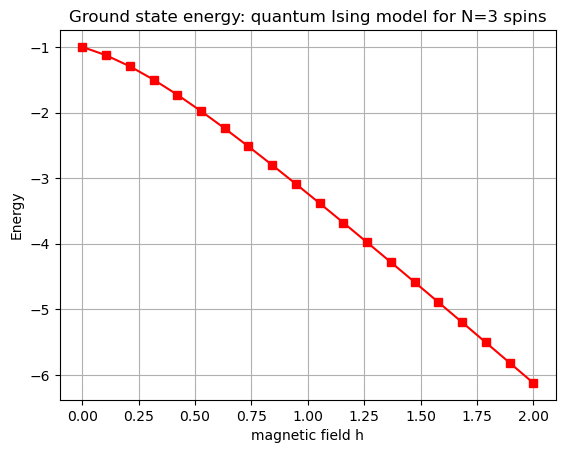

PyObject Text(24.000000000000007, 0.5, 'Energy')

In [38]:
#using Pkg
#Pkg.add("PyPlot")
using PyPlot
plot(h,E0, marker="s", color = "r")
grid("on")
title("Ground state energy: quantum Ising model for N=3 spins")
xlabel("magnetic field h")
ylabel("Energy")